### Import Libraries

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

### Parameters

In [3]:
pop_size = 50
p_c = 0.25
p_m = 0.01
m1 = 18
m2 = 15

### Helper Functions 

In [4]:
def f(x,y):
    f = 21.5 + x * np.sin(4 * math.pi * x) + y * np.sin(20 * math.pi * y)
    return f

def x_binary2decimal(binary):
    dec = -3. + (12.1 + 3.)/(2**18 - 1)*int(binary, 2)
    return dec 

def y_binary2decimal(binary):
    dec = 4.1 + (5.8 - 4.1)/(2**15 - 1)*int(binary, 2)
    return dec

def initialize_chromosome(m1 = m1, m2 = m2, p = 0.5):
    b_ = np.random.binomial(1, p, m1)
    b__ = np.random.binomial(1, p, m2)
    b = np.r_[b_, b__]
    return b

def initialize_all_chromosomes(print_ = True, pop_size = pop_size):
    b = []
    for i in range(pop_size):
        chromosome = initialize_chromosome()
        b.append(chromosome)
        if print_:
            print("b({}) = {}".format(i, array2string(chromosome)))
    return b

def array2string(chromosome):
    chr_list = chromosome.tolist()
    chr_str = "".join(str(e) for e in chr_list)
    return chr_str

def compute_fitness(b, m1 = m1, print_ = True):
    fitness = []
    cnt = 0
    for chromosome in b:
        chr_str = array2string(chromosome)
        x = x_binary2decimal(chr_str[:m1])
        y = y_binary2decimal(chr_str[m1:])
        fitness.append(f(x,y))
        if print_:
            print("fitness({}) = {}".format(cnt, f(x,y).round(4)))
        cnt += 1
    return fitness

def compute_probability_of_selection(fitness, print_ = True):
    p = []
    cnt = 0
    F = sum(fitness)
    for fit in fitness:
        p.append(fit/F)
        if print_:
            print("The probability of selection for chromosome {} is {}".format(cnt, round(fit/F, 6)))
        cnt += 1
    return p

def compute_cumulative_probability_of_selection(fitness, print_ = True):
    p_cumul = []
    cnt = 0
    cumul_proba = 0
    for fit in fitness:
        cumul_proba += fit/sum(fitness)
        p_cumul.append(cumul_proba)
        if print_:
            print("The probability of selection for chromosome {} is {}".format(cnt, round(cumul_proba,4)))
        cnt += 1
    return p_cumul

def find_index_of_first_negative_element_in_list(list_):
    for i, elem in enumerate(list_):
        if list_[i] < 0:
            return i
        
def select_chromosomes_from_roulette(p_cumul):
    random_numbers = np.random.uniform(0,1,pop_size)
    indices_roulette = []
    for number in random_numbers:
        chr_index = find_index_of_first_negative_element_in_list(number - p_cumul)
        indices_roulette.append(chr_index)
    return indices_roulette

def spin_the_roulette_wheel(b, p_cumul, print_ = True):
    new_chromosomes = select_chromosomes_from_roulette(p_cumul)
    if print_:
        print("The new chromosomes are:")
    b_new = []
    for chr_idx in new_chromosomes:
        b_new.append(b[chr_idx])
        if print_:
            print("b'({}) = {}".format(chr_idx, array2string(b[chr_idx])))      
    return b_new

def remove_or_add_one_chromosome_to_crossover_set(chrs_to_mate, pop_size = pop_size):
    
    # if the number of chromosomes is odd
    if len(chrs_to_mate) % 2 == 1:
        # remove or add one chromosome to the cross-over set
        rand_bern = np.random.binomial(1, 0.5)
        
        if rand_bern == 0:
            # remove
            to_remove = random.choice(chrs_to_mate)
            chrs_to_mate.remove(to_remove)
        else:
            # add
            idx_remaining = list(set(np.linspace(0, pop_size - 1, pop_size, dtype = int)) - set(chrs_to_mate))
            to_add = random.choice(idx_remaining)
            chrs_to_mate.append(to_add)
    return chrs_to_mate

def recombination(b, p_c=p_c, pop_size=pop_size, m1=m1, m2=m2, print_=True):
    b_copy = np.array(b.copy())
    b = np.array(b.copy())
    random_numbers = np.random.uniform(0, 1, pop_size)
    chrs_to_mate = list(np.where(random_numbers - p_c < 0)[0])
    chrs_to_mate = remove_or_add_one_chromosome_to_crossover_set(chrs_to_mate)
    if print_:
        print("chromosomes_for_recombination:", chrs_to_mate)
    for even, odd in zip(chrs_to_mate[0::2], chrs_to_mate[1::2]):
        bites_to_crossover = np.random.randint(1, m1 + m2 - 1)
        if print_:
            print("Number of bytes to crossover in pair ({},{}): {}".format(even, odd, bites_to_crossover))
        b_even = b_copy[even,:bites_to_crossover]
        b_odd = b_copy[odd,:bites_to_crossover]

        b[even,:bites_to_crossover] = b_odd
        b[odd,:bites_to_crossover] = b_even
    return [np.array(b[row,:]) for row in range(b.shape[0])]


def mutate(b, p_m=p_m, m1=m1, m2=m2, print_=True):
    b = np.array(b.copy())
    b_copy = np.array(b.copy())
    cnt = 0
    for i in range(len(b)):
        bytes_to_mutate = np.where(np.random.uniform(0, 1, m1 + m2) < np.array([p_m] * (m1 + m2)))[0]
        for byte_to_mutate in bytes_to_mutate:
            if print_:
                print("In chromosome {} mutate byte with index {}".format(i, byte_to_mutate))
            b[i,byte_to_mutate] = 1 - b_copy[i,byte_to_mutate]
            cnt += 1
    return [np.array(b[row,:]) for row in range(b.shape[0])]

# First perform one iteration of the genetic algorithm, and print out all the intermediate steps

### Initialize chromosomes

In [5]:
b = initialize_all_chromosomes(print_ = True)

b(0) = 100000000110100100000000111011110
b(1) = 001011011000000000010000001010010
b(2) = 100101111011100101011101011111010
b(3) = 011110111010111101010011001000000
b(4) = 101110110011000010001011010010011
b(5) = 110111111111101101000110011110100
b(6) = 110111111001010000101001100010101
b(7) = 000111011000101110110001001100001
b(8) = 000000101011010101000011110011001
b(9) = 111011110111100100000010111010001
b(10) = 000100000000001011100010010010001
b(11) = 010110111101000000001101010101111
b(12) = 110110011011101111101010101001101
b(13) = 111100100001100111010111101001110
b(14) = 101101110011111001101001010010100
b(15) = 001011110000110110000110011101010
b(16) = 001011100000101000011011010010000
b(17) = 111100000001011011011011000010101
b(18) = 010011011111111011010110000011011
b(19) = 011101100110011111110111010101111
b(20) = 011011111110101000100110101100001
b(21) = 111101001111111110001110111111010
b(22) = 001011110001111011000010111010011
b(23) = 011100000000011000101001010001100
b(

### Evaluate fitness

In [6]:
fitness = compute_fitness(b, print_ = True)

fitness(0) = 29.2986
fitness(1) = 25.6337
fitness(2) = 13.7311
fitness(3) = 21.4022
fitness(4) = 25.4391
fitness(5) = 22.0566
fitness(6) = 29.8132
fitness(7) = 23.5739
fitness(8) = 19.1659
fitness(9) = 28.4896
fitness(10) = 25.937
fitness(11) = 18.1745
fitness(12) = 17.0421
fitness(13) = 21.9483
fitness(14) = 15.215
fitness(15) = 17.4006
fitness(16) = 26.2045
fitness(17) = 35.9025
fitness(18) = 19.3764
fitness(19) = 15.4046
fitness(20) = 29.9944
fitness(21) = 14.3743
fitness(22) = 17.4479
fitness(23) = 23.8439
fitness(24) = 27.227
fitness(25) = 26.7904
fitness(26) = 31.2269
fitness(27) = 7.737
fitness(28) = 25.2071
fitness(29) = 15.6004
fitness(30) = 29.1265
fitness(31) = 17.8579
fitness(32) = 17.3641
fitness(33) = 15.2953
fitness(34) = 26.0
fitness(35) = 16.9469
fitness(36) = 17.6417
fitness(37) = 26.2618
fitness(38) = 14.2349
fitness(39) = 18.8165
fitness(40) = 25.2812
fitness(41) = 24.3856
fitness(42) = 8.0817
fitness(43) = 22.2646
fitness(44) = 27.0563
fitness(45) = 33.8814
fitness

In [7]:
min_idx = np.argmin(fitness)
max_idx = np.argmax(fitness)

# The minimum fitness
print("The minimum fitness is found for chromosome:", min_idx)
print("The fitness value is:", round(fitness[min_idx], 2))

# The maximum fitness
print("\nThe minimum fitness is found for chromosome:", max_idx)
print("The fitness value is:", round(fitness[max_idx], 2))

# The cumulative fitness
F = sum(fitness)
print("\nThe cumulative fitness is:", round(F, 2))

The minimum fitness is found for chromosome: 27
The fitness value is: 7.74

The minimum fitness is found for chromosome: 17
The fitness value is: 35.9

The cumulative fitness is: 1113.86


### Probability of Selection

In [8]:
p = compute_probability_of_selection(fitness, print_ = True)

The probability of selection for chromosome 0 is 0.026304
The probability of selection for chromosome 1 is 0.023013
The probability of selection for chromosome 2 is 0.012328
The probability of selection for chromosome 3 is 0.019214
The probability of selection for chromosome 4 is 0.022839
The probability of selection for chromosome 5 is 0.019802
The probability of selection for chromosome 6 is 0.026766
The probability of selection for chromosome 7 is 0.021164
The probability of selection for chromosome 8 is 0.017207
The probability of selection for chromosome 9 is 0.025577
The probability of selection for chromosome 10 is 0.023286
The probability of selection for chromosome 11 is 0.016317
The probability of selection for chromosome 12 is 0.0153
The probability of selection for chromosome 13 is 0.019705
The probability of selection for chromosome 14 is 0.01366
The probability of selection for chromosome 15 is 0.015622
The probability of selection for chromosome 16 is 0.023526
The probab

### Cumulative Probability of Selection

In [9]:
p_cumul = compute_cumulative_probability_of_selection(fitness, print_ = True)

The probability of selection for chromosome 0 is 0.0263
The probability of selection for chromosome 1 is 0.0493
The probability of selection for chromosome 2 is 0.0616
The probability of selection for chromosome 3 is 0.0809
The probability of selection for chromosome 4 is 0.1037
The probability of selection for chromosome 5 is 0.1235
The probability of selection for chromosome 6 is 0.1503
The probability of selection for chromosome 7 is 0.1714
The probability of selection for chromosome 8 is 0.1886
The probability of selection for chromosome 9 is 0.2142
The probability of selection for chromosome 10 is 0.2375
The probability of selection for chromosome 11 is 0.2538
The probability of selection for chromosome 12 is 0.2691
The probability of selection for chromosome 13 is 0.2888
The probability of selection for chromosome 14 is 0.3025
The probability of selection for chromosome 15 is 0.3181
The probability of selection for chromosome 16 is 0.3416
The probability of selection for chromoso

### Spin the Roulette Wheel

In [10]:
b_new = spin_the_roulette_wheel(b, p_cumul, True)

The new chromosomes are:
b'(46) = 010011110011101111010100000010101
b'(45) = 101100111100111011100110011101000
b'(28) = 111101101000011001111110010101000
b'(9) = 111011110111100100000010111010001
b'(41) = 011101111100111100000011101111101
b'(23) = 011100000000011000101001010001100
b'(39) = 010111011011001000001110100001010
b'(30) = 110111110011100101011000100111101
b'(44) = 001000001001100011101010101000100
b'(31) = 101110000011110001101001111110000
b'(25) = 001010000000101111110001100011111
b'(14) = 101101110011111001101001010010100
b'(11) = 010110111101000000001101010101111
b'(37) = 110101101010100101110011010011000
b'(31) = 101110000011110001101001111110000
b'(20) = 011011111110101000100110101100001
b'(34) = 011011111111001001011111110111111
b'(44) = 001000001001100011101010101000100
b'(35) = 000111010011000011110011010101010
b'(0) = 100000000110100100000000111011110
b'(7) = 000111011000101110110001001100001
b'(26) = 101100110010111011100010011011010
b'(16) = 00101110000010100001101

### Apply recombination operator (crossover)

In [11]:
b_new = recombination(b_new, print_ = True)

chromosomes_for_recombination: [5, 7, 10, 17, 21, 23, 30, 38]
Number of bytes to crossover in pair (5,7): 2
Number of bytes to crossover in pair (10,17): 22
Number of bytes to crossover in pair (21,23): 31
Number of bytes to crossover in pair (30,38): 19


### Apply the mutation operator

In [12]:
b_new = mutate(b_new, print_ = True)

In chromosome 1 mutate byte with index 30
In chromosome 3 mutate byte with index 1
In chromosome 3 mutate byte with index 22
In chromosome 6 mutate byte with index 8
In chromosome 6 mutate byte with index 11
In chromosome 11 mutate byte with index 10
In chromosome 11 mutate byte with index 26
In chromosome 19 mutate byte with index 17
In chromosome 22 mutate byte with index 26
In chromosome 26 mutate byte with index 12
In chromosome 29 mutate byte with index 13
In chromosome 30 mutate byte with index 2
In chromosome 32 mutate byte with index 26
In chromosome 35 mutate byte with index 3
In chromosome 35 mutate byte with index 20
In chromosome 40 mutate byte with index 17
In chromosome 42 mutate byte with index 12
In chromosome 44 mutate byte with index 16


In [13]:
total_fitness = sum(compute_fitness(b_new, print_ = True))
print("\nTotal fitness {}".format(total_fitness))

fitness(0) = 27.018
fitness(1) = 33.896
fitness(2) = 25.2071
fitness(3) = 18.6222
fitness(4) = 24.3856
fitness(5) = 30.5512
fitness(6) = 17.7816
fitness(7) = 22.9302
fitness(8) = 27.0563
fitness(9) = 17.8579
fitness(10) = 23.6791
fitness(11) = 16.8547
fitness(12) = 18.1745
fitness(13) = 26.2618
fitness(14) = 17.8579
fitness(15) = 29.9944
fitness(16) = 26.0
fitness(17) = 23.8202
fitness(18) = 16.9469
fitness(19) = 29.3006
fitness(20) = 23.5739
fitness(21) = 29.1115
fitness(22) = 26.1233
fitness(23) = 31.2167
fitness(24) = 25.7104
fitness(25) = 25.2071
fitness(26) = 33.8357
fitness(27) = 31.2269
fitness(28) = 19.1659
fitness(29) = 25.0692
fitness(30) = 16.9518
fitness(31) = 26.0
fitness(32) = 23.1214
fitness(33) = 26.2618
fitness(34) = 21.4022
fitness(35) = 17.8348
fitness(36) = 7.737
fitness(37) = 22.2646
fitness(38) = 29.6669
fitness(39) = 33.8814
fitness(40) = 26.2649
fitness(41) = 15.215
fitness(42) = 24.3206
fitness(43) = 25.937
fitness(44) = 29.9961
fitness(45) = 17.4479
fitness(46

As can be seen the total fitness after one iteration is already significantly higher than at initialization of the chromosomes.

# Loop over 2000 iterations of the algorithm. Find the best individual and graph the evolution of the maximum fitness and the total fitness

In [14]:
b = initialize_all_chromosomes(print_ = False)
fitness = compute_fitness(b, print_ = False)
fitness_list = [fitness]
total_fitness = [sum(fitness)]
max_fitness = [max(fitness)]
best_fitness = 0

for iter_ in range(2000):
    p_cumul = compute_cumulative_probability_of_selection(fitness, print_ = False)
    b = spin_the_roulette_wheel(b, p_cumul, False)
    b = recombination(b, print_ = False)
    b = mutate(b, print_ = False)
    fitness = compute_fitness(b, print_ = False)
    fitness_list.append(fitness)
    total_fitness.append(sum(fitness))
    max_fitness.append(max(fitness))
    if max(fitness) > best_fitness:
        best_fitness = max(fitness)
        best_idx = np.argmax(b)
        generation = iter_
        x = x_binary2decimal(array2string(b[best_idx][:m1]))
        y = y_binary2decimal(array2string(b[best_idx][m1:]))
        
        
print("The best individual has fitness {}, and is found in generation {}!".format(round(best_fitness,2), generation))
print("The function values (x, y) at this point are ({}, {})".format(round(x, 2), round(y, 2)))

The best individual has fitness 38.85, and is found in generation 1746!
The function values (x, y) at this point are (11.62, 5.73)


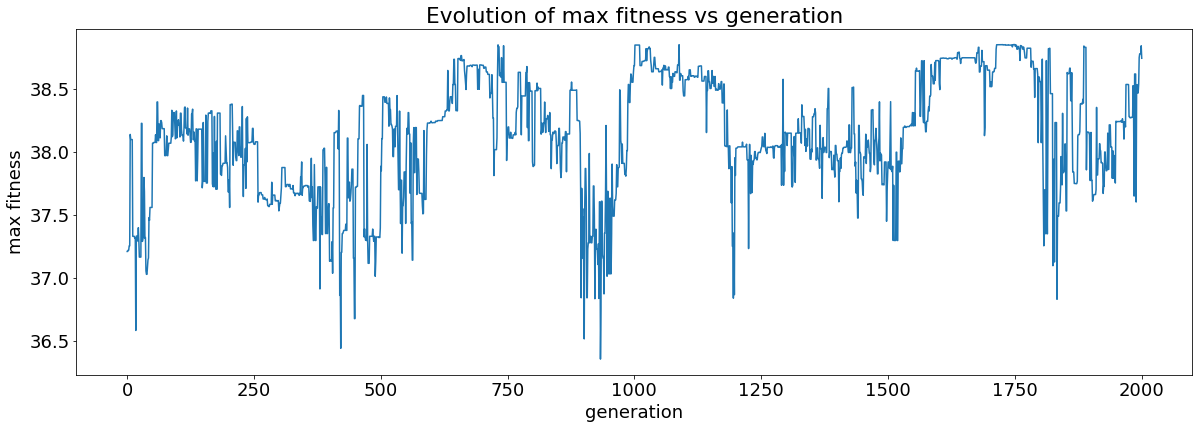

In [19]:
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(20, 14))
plt.subplot(211)
plt.plot(max_fitness)
plt.title("Evolution of max fitness vs generation")
plt.ylabel("max fitness")
plt.xlabel("generation")

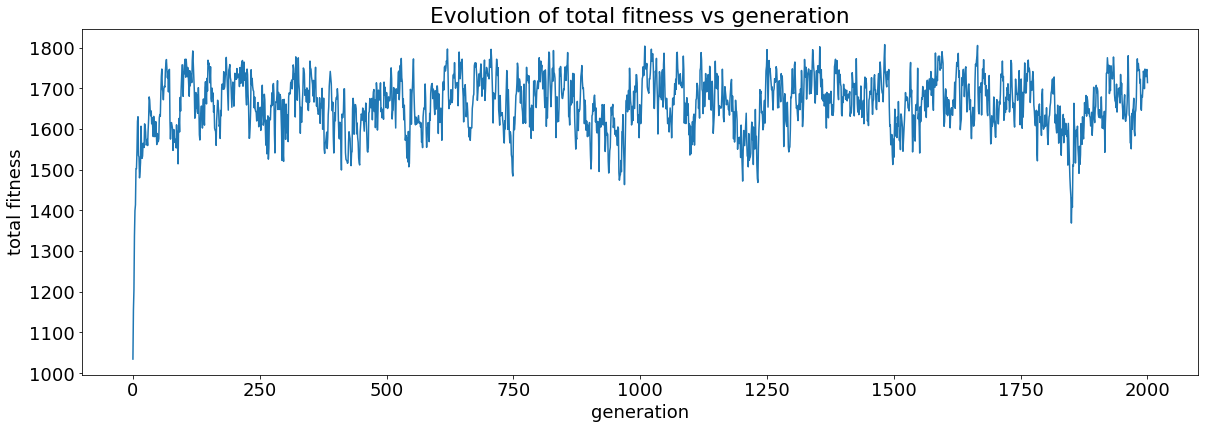

In [20]:
plt.figure(figsize=(20, 14))
plt.subplot(211)
plt.plot(total_fitness)
plt.title("Evolution of total fitness vs generation")
plt.ylabel("total fitness")
plt.xlabel("generation")

The total fitness seems to converge already after about 100 iterations. Though in order to find the best individuum (or get close to it) one needs to iterate at least for 1000 iterations.